In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Time series related packages:
from datetime import date, datetime

#Custom Packages
import KYD

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Changing default parameters in plots
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [3]:
# Function that converts a string into datetime format. 
dateparse = lambda x: datetime.strptime(x, "%B %d, %Y")
#Checking Function:
print(dateparse("June 28, 2020"))

# Function that converts a string into datetime format. 
dateparse = lambda x: datetime.strptime(x,  "%d-%m-%Y")
#Checking Function:
print(dateparse("28-06-2020",))

2020-06-28 00:00:00
2020-06-28 00:00:00


In [4]:
dateparse = lambda x: datetime.strptime(x,'%m/%d/%Y')

electricity_df = pd.read_csv("electricity_consumption.csv", 
                             parse_dates=["Bill_Date"], # Give the column that contains Dates
                             date_parser = dateparse # Function to parse the date strings
                            )
electricity_df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [5]:
# In Time Series, set datetime as index. It'll help in better analytics. 
electricity_df.set_index(['Bill_Date'],inplace=True)

# We can now find data using dates / years
electricity_df['2016':'2018']

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.00,247.73,31
2016-02-01,292,1138.8,175.20,234.11,31
2016-03-01,130,507.0,78.00,123.85,29
2016-04-01,117,456.3,70.20,111.22,29
2016-05-01,136,530.4,81.60,118.37,29
2016-06-01,63,245.7,37.80,77.81,32
2016-07-01,110,429.0,66.00,86.67,30
2016-08-01,176,686.4,105.60,122.40,29
2016-09-01,357,1392.3,214.20,223.62,33


In [6]:
KYD.basic_details(electricity_df)

Rows      : 53
Columns      : 5

Features      :
 ['On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

Missing Values    :
 On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

Unique Values    :
 On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


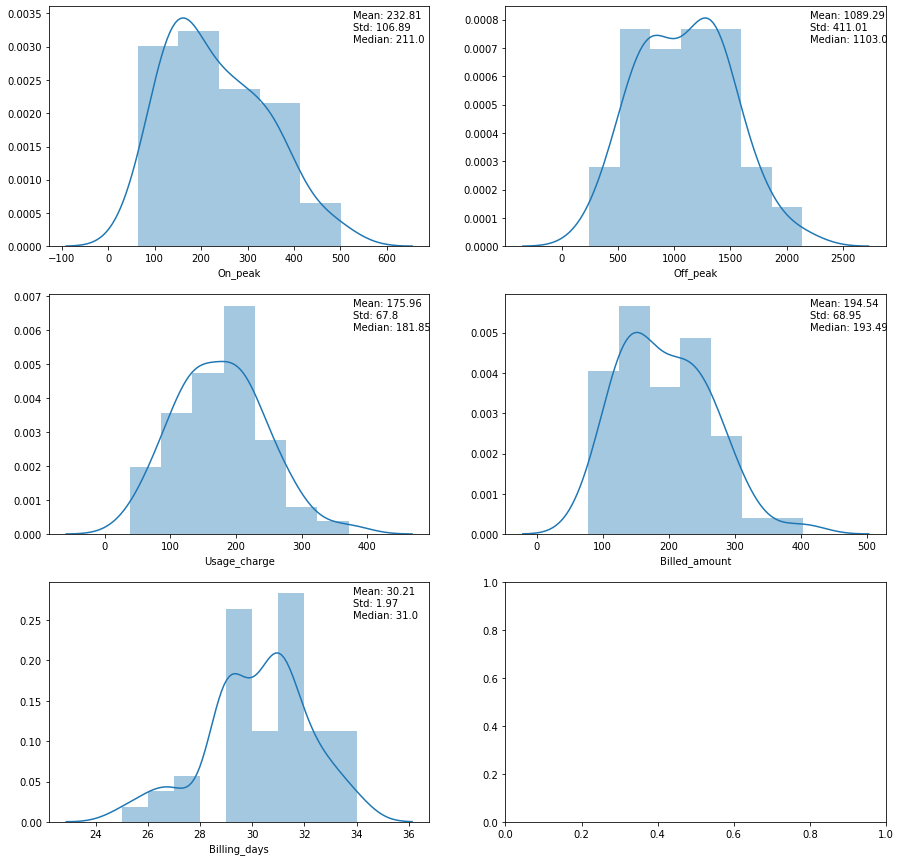

In [7]:
KYD.univariate_numeric(electricity_df,
                       ['On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days'],
                      kde_status=True)

# MOVING AVERAGES:

1. Moving Averages are effective tool of forecasting when the Time Series is Stationary with no major fluctuations. Because, Moving Average flats out the curve (due to averaging). Therefore, in the non-stationary time series, presence of sudden spikes will affect the analysis.  

### Simple Moving Average: 
Average of particular time window.

In [8]:
bill_amount = electricity_df['2016':'2018'][['Billed_amount']]
bill_amount

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


In [9]:
bill_amount['Billed_amount_MA'] = bill_amount["Billed_amount"].rolling(window=3).mean().shift(1)
bill_amount

,Billed_amount,Billed_amount_MA
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


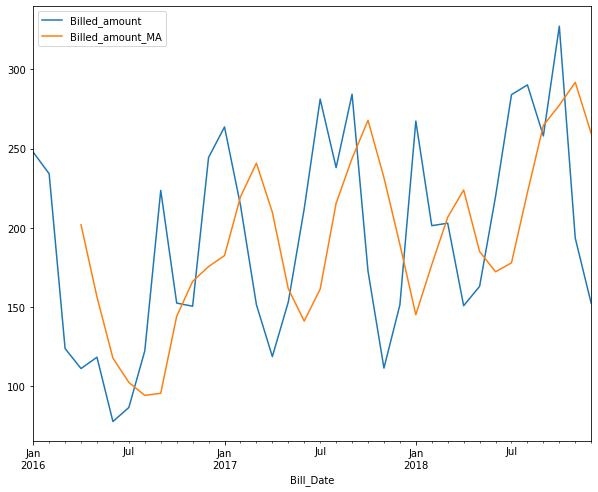

In [10]:
bill_amount.plot()
plt.show()

### Weighted Moving Average: 
Giving weights to each date within the time window chosen.

In [11]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

In [12]:
bill_amount["Billed_Amount_WMA"] = bill_amount["Billed_amount"].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)
bill_amount

,Billed_amount,Billed_amount_MA,Billed_Amount_WMA
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


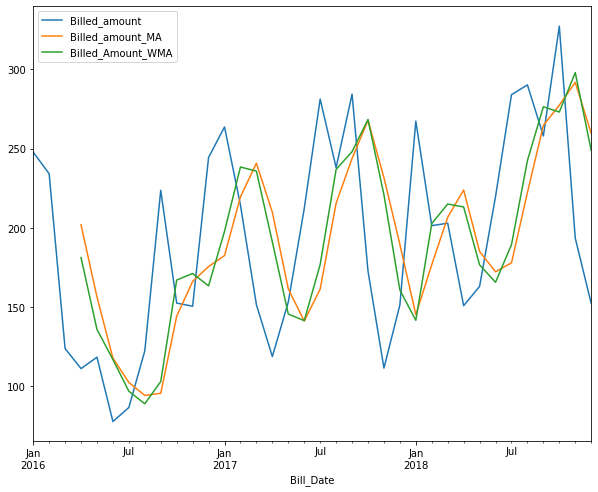

In [13]:
bill_amount.plot()
plt.show()

### Exponential Moving Average:

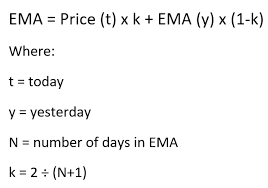

**Smoothing Factor (k, alpha)**: If the smoothing factor is high, recent values are given more weight.

In [21]:
bill_amount["Billed_Amount_EMA"] = bill_amount["Billed_amount"].ewm(alpha= 0.7, #Smooting Factor(k)
                                                                    #span=3, #N
                                                                    adjust=False,
                                                                    min_periods=3).mean().shift(1)
bill_amount

,Billed_amount,Billed_amount_MA,Billed_Amount_WMA,Billed_Amount_EMA
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN
2016-03-01,123.85,NaN,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,158.153800
2016-05-01,118.37,156.393333,135.911667,125.300140
2016-06-01,77.81,117.813333,116.900000,120.449042
2016-07-01,86.67,102.466667,96.898333,90.601713
2016-08-01,122.40,94.283333,89.000000,87.849514
2016-09-01,223.62,95.626667,103.058333,112.034854


## Evaluating Time Series Models:
**1. RMSE** : 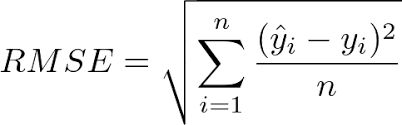

In [22]:
((bill_amount["Billed_amount"]-bill_amount["Billed_amount_MA"])**2).mean()**0.5

70.98561687433802

In [24]:
((bill_amount["Billed_amount"]-bill_amount["Billed_Amount_WMA"])**2).mean()**0.5

65.82572602256133

In [25]:
((bill_amount["Billed_amount"]-bill_amount["Billed_Amount_EMA"])**2).mean()**0.5

61.26408398853503

In [93]:
#Clearly Exponential Moving Average is performing better. Let's do hypertuning:

hyper_tuning_df = pd.DataFrame(columns=["Alpha",'Min Periods','RMSE'])

for mp in range(3,15):
    
    for k in np.arange(0.1, 1.1, 0.1):
        
        bill_amount['Billed_Amount_EMA_k'] = bill_amount["Billed_amount"].ewm(alpha= k, adjust=False,min_periods=mp).mean().shift(1)
        RMSE = ((bill_amount["Billed_amount"]-bill_amount["Billed_Amount_EMA_k"])**2).mean()**0.5
        hyper_tuning_df = hyper_tuning_df.append({'Alpha':k,'Min Periods':mp,'RMSE': RMSE},ignore_index=True)
    
hyper_tuning_df

,Alpha,Min Periods,RMSE
0,0.1,3.0,69.881420
1,0.2,3.0,66.853016
2,0.3,3.0,65.224244
3,0.4,3.0,64.022127
4,0.5,3.0,62.984415
...,...,...,...
115,0.6,14.0,65.565219
116,0.7,14.0,65.042962
117,0.8,14.0,64.450392
118,0.9,14.0,63.989333


In [94]:
hyper_tuning_df = hyper_tuning_df.pivot("Alpha","Min Periods","RMSE")
hyper_tuning_df

Min Periods,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
Alpha,,,,,,,,,,,,
0.1,69.881420,67.557649,66.075686,62.577411,60.188853,60.026491,60.562418,61.390480,62.297402,62.143620,61.330126,62.542520
0.2,66.853016,65.068592,64.509623,62.713813,62.242587,63.176897,62.383511,63.562080,64.807611,63.624145,62.215412,63.427812
0.3,65.224244,64.001747,64.114866,63.395816,63.831082,64.960427,63.163279,64.366442,65.640271,64.269486,63.265329,64.655057
0.4,64.022127,63.309162,63.855465,63.768964,64.603494,65.667143,63.335486,64.536786,65.808696,64.538616,64.098295,65.530380
0.5,62.984415,62.711578,63.510055,63.780588,64.779629,65.736260,63.215001,64.361886,65.612217,64.432679,64.453440,65.798199
0.6,62.057539,62.153236,63.078889,63.541708,64.601338,65.470718,62.964812,63.968842,65.189983,64.009004,64.377704,65.565219
0.7,61.264084,61.658262,62.632491,63.190086,64.266189,65.076991,62.695374,63.462609,64.664884,63.399017,64.041365,65.042962
0.8,60.655739,61.280602,62.261151,62.856069,63.930457,64.707747,62.505964,62.955553,64.158337,62.763935,63.633688,64.450392
0.9,60.294658,61.084891,62.056396,62.656269,63.721025,64.486755,62.493680,62.565524,63.784201,62.268617,63.328252,63.989333


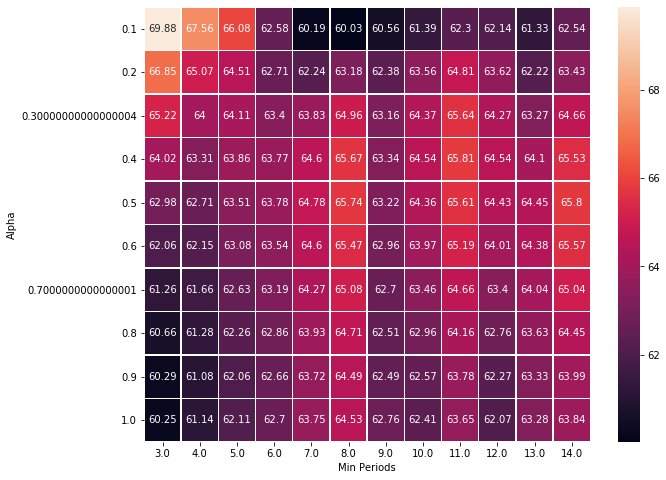

In [95]:
sns.heatmap(hyper_tuning_df, annot=True, fmt='.4g',linewidths=.5)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

However, higher window period will flat out the curve. 

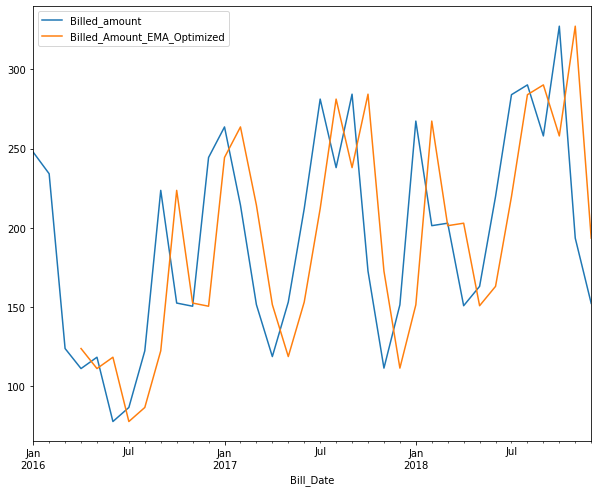

In [97]:
bill_amount['Billed_Amount_EMA_Optimized'] = bill_amount["Billed_amount"].ewm(alpha= 1, 
                                                                              adjust=False,
                                                                              min_periods=3).mean().shift(1)
bill_amount[["Billed_amount","Billed_Amount_EMA_Optimized"]].plot()